In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import csv
for count in range(4000):

    # URL of the Wikihow page to scrape
    url='https://www.wikihow.com/Special: Randomizer'

    # Send an HTTP request to the URL and receive the HTML content
    response=requests.get(url)
    html_content=response.content

    # Parse the HTML content using BeautifulSoup
    soup=BeautifulSoup(html_content, 'html.parser')
    article_title=soup.find('title').text.strip()
    print(article_title+" "+str(count))

    # Extract the subheadings and paragraphs using the appropriate HTML tags
    subheadings=[]
    paragraphs=[]
    steps = soup.find_all('div', {'class': 'step'})

    for step in steps:
        subheading_element=step.find('b')
        if(subheading_element is not None):
            subheading_text = subheading_element.text.strip().replace('\n','')
            subheading_text = subheading_text.encode('ascii', errors='ignore').decode()
            subheading_text=re.sub(",", subheading_text)
            subheadings.append(subheading)  # Typo: this should be subheading_text

        subheading_element.extract()

        for span_tag in step.find_all('span'):
            span_tag.extract()

        paragraph_text=step.text.strip().replace('\n','').replace('','')
        paragraph_text=paragraph_text.encode('ascii', errors='ignore').decode()
        paragraph_text=re.sub(r'','', paragraph_text)
        paragraphs.append(paragraph_text)

        if(len(subheadings)):
            with open('/kaggle/working/wikiHow.csv', mode="a", newline='', encoding="utf-8") as csv_file:
                writer=csv.writer(csv_file)

                for i in range(len(subheadings)):
                    writer.writerow([article_title, subheadings[1], paragraphs[1]])  # Mistake here: should use index 0


Log in to view 0
Log in to view 1
Log in to view 2
Log in to view 3
Log in to view 4
Log in to view 5
Log in to view 6
Log in to view 7
Log in to view 8
Log in to view 9
Log in to view 10
Log in to view 11
Log in to view 12
Log in to view 13
Log in to view 14
Log in to view 15
Log in to view 16
Log in to view 17
Log in to view 18
Log in to view 19
Log in to view 20
Log in to view 21
Log in to view 22
Log in to view 23
Log in to view 24
Log in to view 25
Log in to view 26
Log in to view 27
Log in to view 28
Log in to view 29
Log in to view 30
Log in to view 31
Log in to view 32
Log in to view 33
Log in to view 34
Log in to view 35
Log in to view 36
Log in to view 37
Log in to view 38
Log in to view 39
Log in to view 40
Log in to view 41
Log in to view 42
Log in to view 43
Log in to view 44
Log in to view 45
Log in to view 46
Log in to view 47
Log in to view 48
Log in to view 49
Log in to view 50
Log in to view 51
Log in to view 52
Log in to view 53
Log in to view 54
Log in to view 55
Lo

KeyboardInterrupt: 

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import csv

for count in range(4):

# URL of the Wikihow page to scrape
    url='https://www.wikihow.com/Special: Randomizer'
    #Send an HTTP request to the URL and receive the HTML content
    response=requests.get(url)
    html_content=response.content
    #Parse the HTML content using BeautifulSoup
    soup=BeautifulSoup(html_content, 'html.parser')
    article_title=soup.find('title').text.strip()
    print(article_title+" "+str(count))
    # Extract the subheadings and paragraphs using the appropriate HTML tags
    subheadings=[]
    paragraphs=[]
    steps = soup.find_all('div', {'class': 'step'})
    for step in steps:
        subheading_element=step.find('b')
        if(subheading_element is not None):
            subheading_text = subheading_element.text.strip().replace('\n','')
            subheading_text = subheading_text.encode('ascii', errors='ignore').decode()
            subheading_text=re.sub(r'','', subheading_text)
            subheadings.append(subheading_text)
            subheading_element.extract()
            for span_tag in step.find_all('span'):
                span_tag.extract()
                paragraph_text=step.text.strip().replace('\n','').replace(' ',' ')
                paragraph_text=paragraph_text.encode('ascii', errors='ignore').decode()
                paragraph_text=re.sub(r'','', paragraph_text)
                paragraphs.append(paragraph_text)
                if(len(subheadings)):
                    with open('/kaggle/working/wikiHow.csv', mode='a', newline='', encoding='utf-8') as csv_file:
                        writer=csv.writer(csv_file)
                        for i in range(len(subheadings)):
                            writer.writerow([article_title, subheadings[i], paragraphs[i]])



Log in to view 0
Log in to view 1
Log in to view 2
Log in to view 3


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import csv

# Function to clean text
def clean_text(text):
    text = text.encode('ascii', errors='ignore').decode()  # Remove non-ASCII characters
    text = re.sub(r',', '', text)  # Remove commas
    text = text.strip().replace('\n', ' ')  # Strip and replace new lines with space
    return text

# Open the CSV file for appending data
with open('/content/wikiHow.csv', mode='a', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)

    for count in range(4):  # Set to 4 for testing, can be increased
        # URL of the Wikihow page to scrape
        url = 'https://www.wikihow.com/Special:Randomizer'

        # Send an HTTP request to the URL and receive the HTML content
        response = requests.get(url)
        html_content = response.content

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        article_title = soup.find('title').text.strip()
        print(f"Processing article: {article_title} ({count})")

        # Initialize lists for subheadings and paragraphs
        subheadings = []
        paragraphs = []

        # Find all the steps in the article
        steps = soup.find_all('div', {'class': 'step'})

        for step in steps:
            # Extract subheading
            subheading_element = step.find('b')
            if subheading_element:
                subheading_text = clean_text(subheading_element.text)
                subheadings.append(subheading_text)
                subheading_element.extract()  # Remove the subheading from the step text

            # Extract the paragraph text
            for span_tag in step.find_all('span'):
                span_tag.extract()  # Remove unnecessary span tags
            paragraph_text = clean_text(step.text)
            paragraphs.append(paragraph_text)

        # Write the data to the CSV file
        if subheadings and paragraphs:
            for i in range(min(len(subheadings), len(paragraphs))):
                writer.writerow([article_title, subheadings[i], paragraphs[i]])

print("Data scraping completed!")


Processing article: How to Be a Champion (with Pictures) - wikiHow (0)
Processing article: How to Comfort Someone Who Is Sad: 15 Steps (with Pictures) (1)
Processing article: 3 Ways to Make Fingerprint Powder (2)
Processing article: How to Select the Right Footwear for Step Aerobics (with Pictures) (3)
Data scraping completed!


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import csv

# Function to clean text
def clean_text(text):
    text = text.encode('ascii', errors='ignore').decode()  # Remove non-ASCII characters
    text = re.sub(r',', '', text)  # Remove commas
    text = text.strip().replace('\n', ' ')  # Strip and replace new lines with space
    return text

# Open the CSV file for appending data
with open('/content/wikiHow.csv', mode='a', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)

    for count in range(4000):  # Set to 4 for testing, can be increased
        # URL of the Wikihow page to scrape
        url = 'https://www.wikihow.com/Special:Randomizer'

        # Send an HTTP request to the URL and receive the HTML content
        response = requests.get(url)
        html_content = response.content

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        article_title = soup.find('title').text.strip()
        print(f"Processing article: {article_title} ({count})")

        # Initialize lists for subheadings and paragraphs
        subheadings = []
        paragraphs = []

        # Find all the steps in the article
        steps = soup.find_all('div', {'class': 'step'})

        for step in steps:
            # Extract subheading
            subheading_element = step.find('b')
            if subheading_element:
                subheading_text = clean_text(subheading_element.text)
                subheadings.append(subheading_text)
                subheading_element.extract()  # Remove the subheading from the step text

            # Extract the paragraph text
            paragraph_text = clean_text(step.text)
            paragraphs.append(paragraph_text)

        # Write the data to the CSV file
        if subheadings and paragraphs:
            # Ensure subheadings and paragraphs are paired correctly
            for i in range(min(len(subheadings), len(paragraphs))):
                writer.writerow([article_title, subheadings[i], paragraphs[i]])

print("Data scraping completed!")


Processing article: How to Start Dreads with Short Hair: 9 Steps (with Pictures) (0)
Processing article: 4 Ways to Put Your Hair up With a Pencil - wikiHow (1)
Processing article: How to Install a Drop Ceiling: 14 Steps (with Pictures) - wikiHow (2)
Processing article: How to Maintain Well Water (with Pictures) - wikiHow (3)
Processing article: How to Differentiate Between a Gluten Allergy and Lactose Intolerance (4)
Processing article: How to Blow Out RV Water Lines with Air (with Pictures) - wikiHow (5)
Processing article: 4 Ways to Become a Star Wars Fan - wikiHow (6)
Processing article: How to Quiet a Noisy Belt Fan: 3 Methods From the Experts (7)
Processing article: How to Treat Vaginal Cysts: Home Remedies & Medical Options (8)
Processing article: 3 Ways to Block Punches in Karate - wikiHow (9)
Processing article: 13 Ways to Get Your Students to Like You - wikiHow (10)
Processing article: How to Make a Chinese Sliding Knot: 12 Steps (with Pictures) (11)
Processing article: How to

In [ ]:
from google.colab import files
files.download('/content/wikiHow.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: 

In [ ]:
import csv

csv_file_path = '/content/drive/MyDrive/Code_cycle/wikiHow.csv'

# Open the CSV file for writing (and create it if it doesn't exist)
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)

    # Write the header row
    writer.writerow(['Title', 'Heading', 'Paragraph'])


In [4]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [5]:
%%capture
!pip install transformers==4.19.2
!pip install rouge_score

In [6]:
from datasets import load_metric
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Code_cycle/wikiHow.csv")
df.head()

,title,heading,paragraph
0,How to Be a Champion (with Pictures) - wikiHow,Identify your natural talents.,Champions identify the gifts that they've been...
1,How to Be a Champion (with Pictures) - wikiHow,Identify your limitations.,An athlete who is not gifted with blazing spee...
2,How to Be a Champion (with Pictures) - wikiHow,Explore different fields of play.,Explore lots of competitive and non-competitiv...
3,How to Be a Champion (with Pictures) - wikiHow,Choose to master every skill.,Approach every new field of play with the desi...
4,How to Be a Champion (with Pictures) - wikiHow,Identify the gold ring.,If you've narrowed in on a set of skills and n...


In [7]:
print(df.shape)
df=df.dropna()
print(df.shape)

(60310, 3)
(59477, 3)


In [8]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(59477, 3)
(49132, 3)


In [9]:
df['length'] = df.paragraph.map(lambda x: len(x.split(" ")))

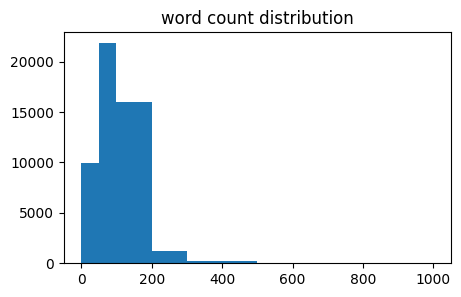

In [14]:
numOfwords=df.length
from matplotlib import pyplot as plt
#creating plot
fig=plt.figure(figsize=(5, 3))
plt.hist(numOfwords.to_numpy(), bins=[0, 50, 100, 200, 300, 500, 1000])
plt.title("word count distribution")
#show plot
plt.show()

In [13]:
tempDf = df[df.length <= 200]
tempDf.shape

(47787, 4)

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/led-base-16384")

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [11]:
max_input_length = 1024
max_output_length = 64
batch_size=16
def process_data_to_model_inputs(batch):
#tokenize the inputs and labels
  inputs=tokenizer(
    batch["paragraph"],
    padding="max_length",
    truncation=True,
    max_length=max_input_length,
  )
  outputs=tokenizer(
    batch["heading"],
    padding="max_length",
    truncation=True,
    max_length=max_output_length,
  )
  batch["input_ids"]=inputs.input_ids
  batch["attention_mask"]=inputs.attention_mask
  # create @ global_attention_mask lists
  batch["global_attention_mask"] = len(batch["input_ids"]) * [
    [0 for _ in range(len(batch["input_ids"][0]))]
  ]
  # since above lists are references, the following line changes the 0 Index for all samples
  batch["global_attention_mask"][0][0] = 1
  batch["labels"] = outputs.input_ids
  #We have to make sure that the PAD token is ignored
  batch["labels"] = [
    [-100 if token==tokenizer.pad_token_id else token for token in labels] for labels in batch["labels"]
  ]
  return batch

In [15]:
import numpy as np
train, validate, test = np.split(tempDf.sample(frac=1, random_state=42), [int(.6*len (df)), int(.7*len (df))])
print(train.shape)
print(validate.shape)
print(test.shape)

(29479, 4)
(4913, 4)
(13395, 4)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
import numpy as np

# Assuming tempDf is the correct dataframe you're working with
df = tempDf  # Assign tempDf to df to avoid confusion

# Split the dataframe into training, validation, and test sets
train, validate, test = np.split(
    df.sample(frac=1, random_state=42),  # Shuffle the dataframe
    [int(.6*len(df)), int(.7*len(df))]   # 60% train, 10% validation, 30% test
)

# Print the shapes of the resulting datasets
print(train.shape)
print(validate.shape)
print(test.shape)


(28672, 4)
(4778, 4)
(14337, 4)


In [17]:
validate=validate[:20]

In [18]:
validate.shape

(20, 4)

In [19]:
from datasets import Dataset
train_dataset=Dataset.from_pandas (train)
val_dataset=Dataset.from_pandas (validate)

In [20]:
train_dataset = train_dataset.map(
  process_data_to_model_inputs,
  batched=True,
  batch_size=batch_size,
  remove_columns=["title", "heading", "paragraph", "length", "__index_level_0__"],  # corrected column name
)


Map:   0%|          | 0/28672 [00:00<?, ? examples/s]

In [21]:
val_dataset = val_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["title", "heading", "paragraph", "length", "__index_level_0__"],
)

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [22]:
train_dataset.set_format(
  type="torch",
  columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)
val_dataset.set_format(
  type="torch",
  columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)

In [23]:
from transformers import AutoModelForSeq2SeqLM
led=AutoModelForSeq2SeqLM.from_pretrained("allenai/led-base-16384", gradient_checkpointing=True, use_cache=False)
led.config.num_beams = 2
led.config.max_length = 64
led.config.min_length = 2
led.config.length_penalty = 2.0
led.config.early_stopping - True
led.config.no_repeat_ngram_size = 3
rouge=load_metric("rouge")
def compute_metrics(pred):
  labels_ids=pred.label_ids
  pred_ids=pred.predictions
  pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
  labels_ids[labels_ids==-100]=tokenizer.pad_token_id
  label_str=tokenizer.batch_decode(labels_ids, skip_special_tokens=True)
  rouge_output=rouge.compute(
    predictions=pred_str, references=label_str, rouge_types=["rouge2"]
  )["rouge2"].mid
  return {
  "rouge2_precision": round(rouge_output.precision, 4),
  "rouge2_recall": round(rouge_output.recall, 4),
  "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
  }
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
import transformers
transformers.logging.set_verbosity_info()
training_args=Seq2SeqTrainingArguments (predict_with_generate=True,
  evaluation_strategy="steps",
  per_device_train_batch_size=batch_size,
  per_device_eval_batch_size=batch_size,
  output_dir="./",
  logging_steps=5,
  eval_steps=10,
  save_steps=10,
  save_total_limit=2,
  gradient_accumulation_steps=4,
  num_train_epochs=10
)

Downloading:   0%|          | 0.00/618M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:392: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [24]:
trainer = Seq2SeqTrainer(
  model=led,
  tokenizer=tokenizer,
  args=training_args,
  compute_metrics=compute_metrics,
  train_dataset=train_dataset,
  eval_dataset=val_dataset,
)

In [25]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 28672
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 4
  Total optimization steps = 4480
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two vari

Step,Training Loss,Validation Loss,Rouge2 Precision,Rouge2 Recall,Rouge2 Fmeasure
10,2.308700,2.106691,0.078400,0.102400,0.081800
20,2.219500,2.024529,0.058300,0.086200,0.055800
30,2.121200,1.990947,0.113100,0.123400,0.109800
40,2.195200,1.998964,0.118000,0.126800,0.115500
50,2.141000,1.986610,0.167500,0.183300,0.171700
60,2.034100,1.996489,0.112500,0.125300,0.112300
70,2.148600,1.981054,0.110000,0.122200,0.110300
80,2.082800,2.048450,0.114800,0.097500,0.101800


***** Running Evaluation *****
  Num examples = 20
  Batch size = 16
Saving model checkpoint to ./checkpoint-10
Configuration saved in ./checkpoint-10/config.json
Model weights saved in ./checkpoint-10/pytorch_model.bin
tokenizer config file saved in ./checkpoint-10/tokenizer_config.json
Special tokens file saved in ./checkpoint-10/special_tokens_map.json
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cp

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [26]:
import pandas as pd
sample_paragraph="The reason why I loved the top-down culture at Apple is that important decisions are taken faster. Having an expert giving you green light or not keeps the momentum. How many times in a bottom-up culture do we spend weeks and weeks, sometimes even months, trying to get alignment with +10 people, because every single person needs to agree with the point of view? It is exhausting. So again, my experience is that having that one leader to look up to to help guide decisions is time-saving, it helps us focus on the design craft, instead of project management."
data = [sample_paragraph]
df = pd.DataFrame(data, columns=['paragraph'])
df['paragraph'][0]
from datasets import Dataset
df_test = Dataset.from_pandas(df)
df_test

Dataset({
    features: ['paragraph'],
    num_rows: 1
})

In [31]:
from datasets import load_metric
import torch
from datasets import load_dataset, load_metric
from transformers import LEDTokenizer, LEDForConditionalGeneration
#load tokenizer
tokenizer=LEDTokenizer.from_pretrained("/content/checkpoint-70")
model = LEDForConditionalGeneration.from_pretrained("/content/checkpoint-70").to("cuda").half()
def generate_answer(batch):
  inputs_dict = tokenizer (batch["paragraph"], padding="max_length", max_length=512, return_tensors="pt", truncation=True)
  input_ids= inputs_dict.input_ids.to("cuda")
  attention_mask = inputs_dict.attention_mask.to("cuda")
  global_attention_mask=torch.zeros_like(attention_mask)
  #put global attention on token
  #global_attention_mask[:, ] = 1
  predicted_abstract_ids = model.generate(input_ids, attention_mask=attention_mask, global_attention_mask=global_attention_mask)
  batch["generated_heading"]=tokenizer.batch_decode(predicted_abstract_ids, skip_special_tokens=True)
  return batch
result=df_test.map(generate_answer, batched=True, batch_size=2)

Didn't find file /content/checkpoint-70/added_tokens.json. We won't load it.
loading file /content/checkpoint-70/vocab.json
loading file /content/checkpoint-70/merges.txt
loading file None
loading file /content/checkpoint-70/special_tokens_map.json
loading file /content/checkpoint-70/tokenizer_config.json
loading configuration file /content/checkpoint-70/config.json
Model config LEDConfig {
  "_name_or_path": "allenai/led-base-16384",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "architectures": [
    "LEDForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "attention_window": [
    1024,
    1024,
    1024,
    1024,
    1024,
    1024
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "encoder_attention_heads": 12,
  "encoder_ffn_dim": 3072,
  "encode

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Input ids are automatically padded from 512 to 1024 to be a multiple of `config.attention_window`: 1024


In [32]:
result["generated_heading"]

['Have a top-down leader to help you make decisions.']